# Preparing a dataset for modeling

## Below, I will create 10 features from an existing dataset
### Dataset: Housing prices competition, Kaggle


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.decomposition import PCA

In [3]:
pd.set_option('display.max_columns', 100)

## Importing the data

In [4]:
train = pd.read_csv('../data/house-prices/train.csv')

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Exploring the data

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Histogram of variables

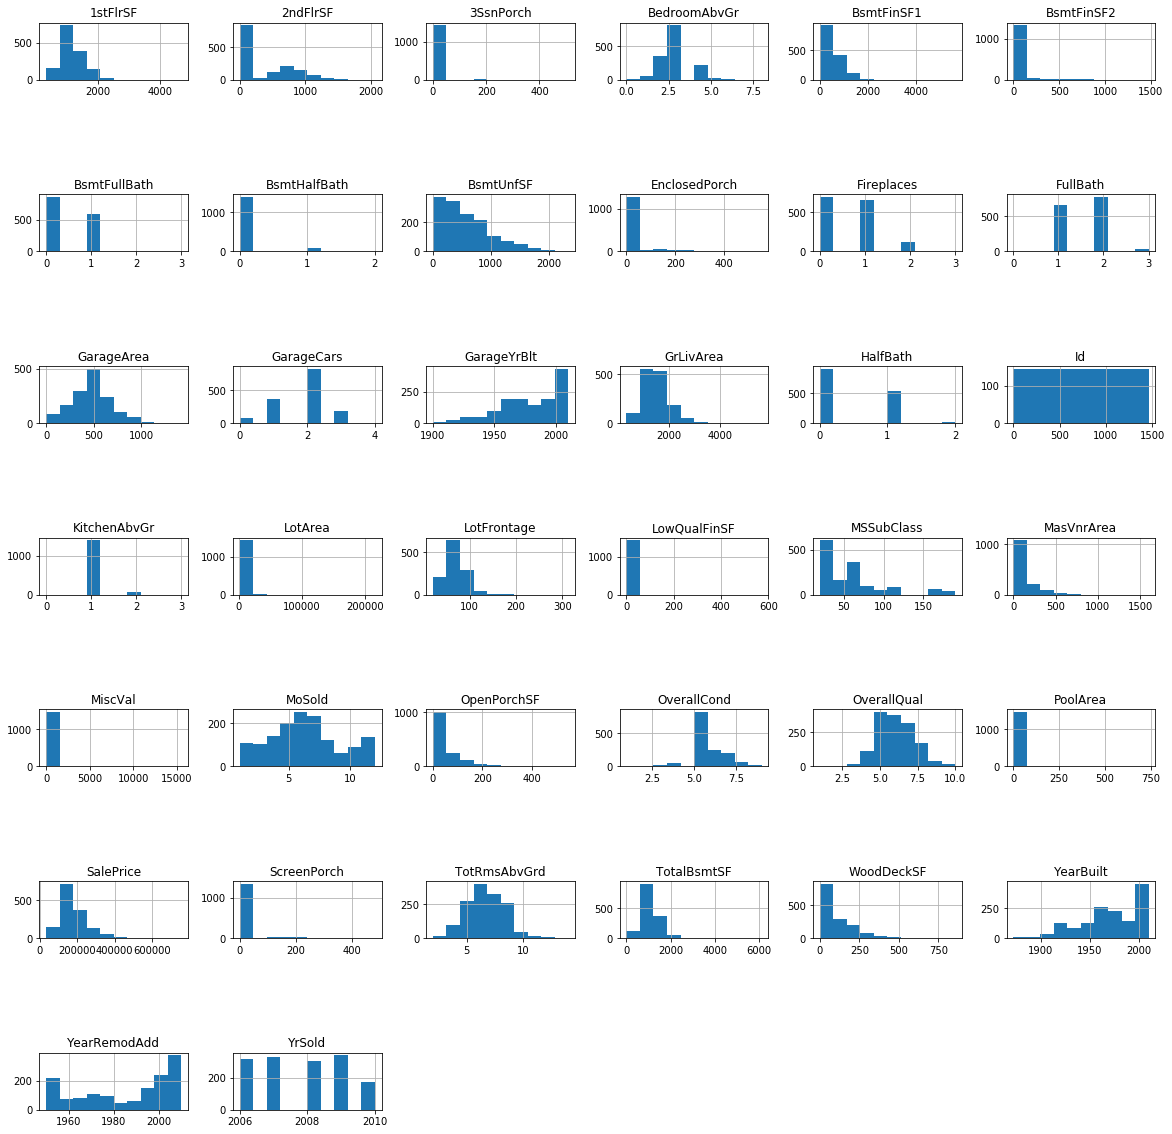

In [8]:
train.hist(figsize=(20,20))
plt.subplots_adjust(hspace = 2)
plt.show()

### Make a modified training dataframe

In the future when I build this out with a model, beyond the feature engineering assignment, I will combine the training and test data to modify all entries together, then separate when I'm fitting and validating the model. For now, I'm strictly using the training dataset.

In [9]:
train_mod = train[['Id', 'SalePrice']]

In [10]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Continuous variables

### Filling in missing values

#### Variables: LotFrontage, GarageYrBlt, MasVnrArea

In [77]:
# changing NaNs with median value
train_mod['LotFrontage'] = train.LotFrontage.fillna(train.LotFrontage.median())
train_mod['GarageYrBlt'] = train.GarageYrBlt.fillna(train.GarageYrBlt.median())

In [12]:
# changing the >10 NaNs with 0, the value for 50% of the entries
train_mod['MasVnrArea'] = train.MasVnrArea.fillna(0)

### Categorical variables

### Converting to numerical representations using one hot encoding or replace

#### Variables: Fence, PoolQC, MiscFeature, Fence, PavedDrive, GarageFinish, GarageType, GarageQual, GarageCond, PavedDrive



In [80]:
print(train.Fence.unique())
print(train.PoolQC.unique())
print(train.MiscFeature.unique())

[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
[nan 'Ex' 'Fa' 'Gd']
[nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [16]:
train_mod.Fence = train.Fence.fillna(0)
train_mod.PoolQC = train.PoolQC.fillna(0)
train_mod.MiscFeature = train.MiscFeature.fillna(0)

In [17]:
isFence = pd.get_dummies(train['Fence'])
print(isFence)

      GdPrv  GdWo  MnPrv  MnWw
0         0     0      0     0
1         0     0      0     0
2         0     0      0     0
3         0     0      0     0
4         0     0      0     0
5         0     0      1     0
6         0     0      0     0
7         0     0      0     0
8         0     0      0     0
9         0     0      0     0
10        0     0      0     0
11        0     0      0     0
12        0     0      0     0
13        0     0      0     0
14        0     1      0     0
15        1     0      0     0
16        0     0      0     0
17        0     0      0     0
18        0     0      0     0
19        0     0      1     0
20        0     0      0     0
21        1     0      0     0
22        0     0      0     0
23        0     0      0     0
24        0     0      1     0
25        0     0      0     0
26        0     0      0     0
27        0     0      0     0
28        0     0      0     0
29        0     0      0     0
...     ...   ...    ...   ...
1430    

In [88]:
isPavedDrive = pd.get_dummies(train['PavedDrive'])

In [18]:
isFence['True'] = np.where((train['Fence'].isin([0])), 0, 1)
print(pd.crosstab(isFence['True'], train['Fence']))

Fence  GdPrv  GdWo  MnPrv  MnWw
True                           
1         59    54    157    11


In [89]:
isGarageFinish = pd.get_dummies(train['GarageFinish'])

In [90]:
isGarageType = pd.get_dummies(train['GarageType'])

In [24]:
isMiscFeature = pd.get_dummies(train['MiscFeature'])

## Converting to numerical representations as boolean

### Variables: SaleCondition, CentralAir, GravelStreet

In [19]:
train.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [20]:
train_mod['isNormalSale'] = train['SaleCondition'].map({'Normal':1}).fillna(0)

In [21]:
train_mod['CentralAir'] = train['CentralAir'].map({'Y':1}).fillna(0)

In [22]:
train_mod['GravelStreet'] = train['Street'].map({'Grvl':1}).fillna(0)

### Converting categories of rankings to numeric
#### Ranking variables made numeric on train_mod dataframe: PoolQuality, GarageCond, GarageQual, FireplaceQu, Functional

In [91]:
# changing rankings to numerical system
train_mod['PoolQuality'] = train['PoolQC'].map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}).fillna(0)
train_mod['GarageCond'] = train['GarageCond'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}).fillna(0)
train_mod['GarageQual'] = train['GarageQual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}).fillna(0)
train_mod['FireplaceQu'] = train['FireplaceQu'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}).fillna(0)
train_mod['Functional'] = train['Functional'].map({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})

In [93]:
train_mod.describe()

,Id,SalePrice,LotFrontage,MasVnrArea,GarageYrBlt,isNormalSale,CentralAir,GravelStreet,FullBath,PoolQuality,GarageCond,GarageQual,FireplaceQu,Functional
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,180921.195890,69.863699,103.117123,1978.589041,0.820548,0.934932,0.004110,4.0,0.013014,2.808904,2.810274,1.825342,6.841781
std,421.610009,79442.502883,22.027677,180.731373,23.997022,0.383862,0.246731,0.063996,NaN,0.204059,0.719685,0.722898,1.810877,0.667698
min,1.000000,34900.000000,21.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,4.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,365.750000,129975.000000,60.000000,0.000000,1962.000000,1.000000,1.000000,0.000000,4.0,0.000000,3.000000,3.000000,0.000000,7.000000
50%,730.500000,163000.000000,69.000000,0.000000,1980.000000,1.000000,1.000000,0.000000,4.0,0.000000,3.000000,3.000000,2.000000,7.000000
75%,1095.250000,214000.000000,79.000000,164.250000,2001.000000,1.000000,1.000000,0.000000,4.0,0.000000,3.000000,3.000000,4.000000,7.000000
max,1460.000000,755000.000000,313.000000,1600.000000,2010.000000,1.000000,1.000000,1.000000,4.0,4.000000,5.000000,5.000000,5.000000,7.000000


## Combining like variables

### Variables: BsmtFullBath, BsmtHalfBAth, HalfBth, and FullBth
Combine to get the total number of bathrooms

In [100]:
train_mod['TotalBath'] = train['BsmtFullBath'] + 0.5* train['BsmtHalfBath'] + train['FullBath'] + 0.5* train['HalfBath']

In [105]:
train_mod['SalePrice'] = train['SalePrice']

In [106]:
train_mod.describe()

,Id,SalePrice,LotFrontage,MasVnrArea,GarageYrBlt,isNormalSale,CentralAir,GravelStreet,FullBath,PoolQuality,GarageCond,GarageQual,FireplaceQu,Functional,TotalBath
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,180921.195890,69.863699,103.117123,1978.589041,0.820548,0.934932,0.004110,2.210616,0.013014,2.808904,2.810274,1.825342,6.841781,2.210616
std,421.610009,79442.502883,22.027677,180.731373,23.997022,0.383862,0.246731,0.063996,0.785399,0.204059,0.719685,0.722898,1.810877,0.667698,0.785399
min,1.000000,34900.000000,21.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,365.750000,129975.000000,60.000000,0.000000,1962.000000,1.000000,1.000000,0.000000,2.000000,0.000000,3.000000,3.000000,0.000000,7.000000,2.000000
50%,730.500000,163000.000000,69.000000,0.000000,1980.000000,1.000000,1.000000,0.000000,2.000000,0.000000,3.000000,3.000000,2.000000,7.000000,2.000000
75%,1095.250000,214000.000000,79.000000,164.250000,2001.000000,1.000000,1.000000,0.000000,2.500000,0.000000,3.000000,3.000000,4.000000,7.000000,2.500000
max,1460.000000,755000.000000,313.000000,1600.000000,2010.000000,1.000000,1.000000,1.000000,6.000000,4.000000,5.000000,5.000000,5.000000,7.000000,6.000000


### Build a heatmap

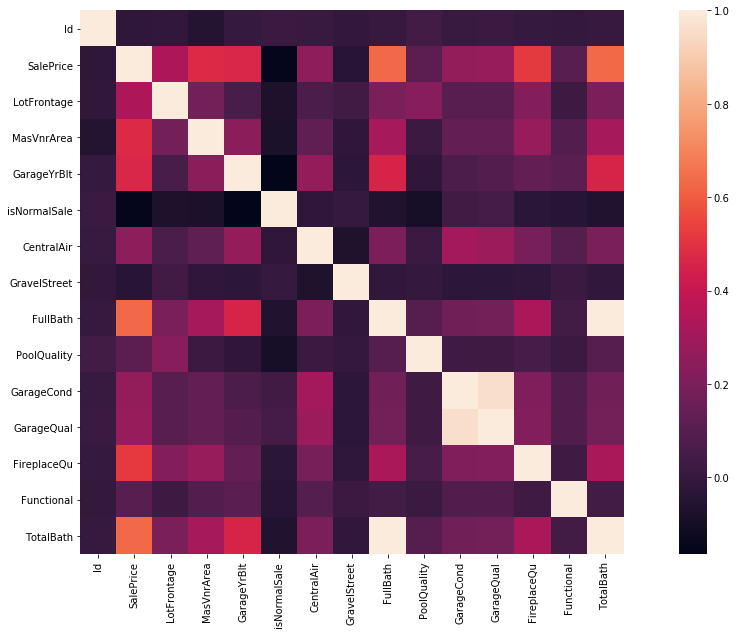

In [108]:
correlation_matrix = train_mod.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(correlation_matrix, square=True)
plt.show()

In [109]:
# heat map, quantified
correlation_matrix = train_mod.corr()
print(correlation_matrix)

                    Id  SalePrice  LotFrontage  MasVnrArea  GarageYrBlt  \
Id            1.000000  -0.021917    -0.009921   -0.051071    -0.000122   
SalePrice    -0.021917   1.000000     0.334771    0.472614     0.466754   
LotFrontage  -0.009921   0.334771     1.000000    0.178469     0.062996   
MasVnrArea   -0.051071   0.472614     0.178469    1.000000     0.244444   
GarageYrBlt  -0.000122   0.466754     0.062996    0.244444     1.000000   
isNormalSale  0.015881  -0.153990    -0.074146   -0.081539    -0.164414   
CentralAir    0.009821   0.251328     0.067350    0.126409     0.270529   
GravelStreet -0.008916  -0.041036     0.037349   -0.017108    -0.024339   
FullBath      0.004540   0.631731     0.200381    0.314248     0.455463   
PoolQuality   0.044012   0.115484     0.234913    0.013228    -0.018503   
GarageCond    0.008607   0.263191     0.102552    0.133749     0.071410   
GarageQual    0.013912   0.273839     0.107230    0.134947     0.089576   
FireplaceQu   0.001760   

## Feature selection: Filter method

### Here I will select 5 of the best features that have been generated on the train_mod dataframe
### I will do this by selecting the 5 top correlating features to sale price on the correlation matrix above

TotalBath (0.632)
FireplaceQu (0.52)
MasVnrArea (0.473)
GarageYrBlt(0.467)
GarageQual (0.274)